<h1 id="Road Safety Data Analysis"><span style="color: #ff0000;">Road Safety Data Analysis (Department for Transport - United Kingdom)</span></h1>

<h2 style="color: #000000;">Data Collection</h2>

The 2015 data for analysis will be used from https://data.gov.uk/dataset/road-accidents-safety-data.


<h2 style="text-align: left;">Initialize libraries, get data sets, consolidate and cleanse.</h2>

In [1]:
# Importing libraries and the data set
from pandas import Series, DataFrame
import pandas as pd
import glob
import numpy as np
import os
import matplotlib.pylab as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = 12, 4  # that's default image size for this interactive session
import scipy
from scipy import stats
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix,  precision_recall_fscore_support, accuracy_score
from sklearn.preprocessing import Binarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
scaler = StandardScaler()

#### Building a Prediction Model  - Using SEX to predict FATALITY - Logistic Regression with L1 Regularization 

Sex: 1 = Male, 2 = Female, 3 = Not known, -1	= Data missing or out of range

Accident Severity: 1 = Fatal, 2	= Serious, 3 = Slight

In [2]:
RoadSafety2015 = pd.read_csv("UKAccident_2015.csv")
sex_list = [1,2]
df = RoadSafety2015[RoadSafety2015['Sex_of_Driver'].isin(sex_list)]
df['Fatality'] = np.where(df.Accident_Severity == 1, 1 , 0)
df['Sex'] = np.where(df.Sex_of_Driver == 2, 1 , 0)
df1 = df[['Sex_of_Driver','Sex', 'Fatality']]

X = pd.DataFrame()
X['sex'] = df['Sex']
X['fatality'] = df['Fatality']

X = X.dropna(axis=0)
y=X['fatality']
X=X.drop(['fatality'], axis =1)

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.5, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty ='l1', C=1)
model.fit(X_train, y_train)
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, penalty='l1', random_state=None, tol=0.0001)
print "Logistic Accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test))


d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Logistic Accuracy is 0.57


In [3]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
print "\n\n---Logistic Model---"
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test))



---Logistic Model---
Logistic AUC = 0.56
             precision    recall  f1-score   support

          0       0.63      0.30      0.40    105143
          1       0.55      0.83      0.66    107623

avg / total       0.59      0.57      0.53    212766



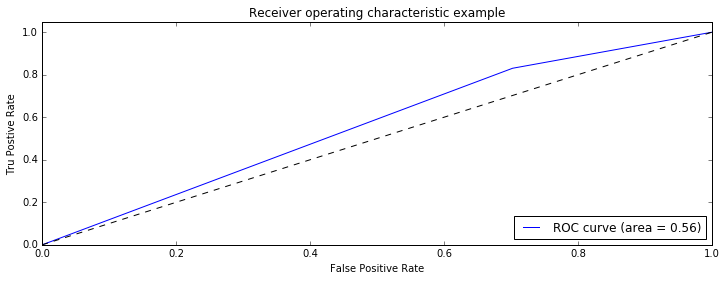

In [4]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Tru Postive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()

#### Building a Prediction Model  - Using DAY_OF_WEEK to predict FATALITY - Logistic Regression with L1 Regularization 

Day of Week: 1 Sunday, 2 Monday, 3 Tuesday, 4 Wednesday, 5 Thursday, 6 Friday, 7 Saturday

Accident Severity: 1 = Fatal, 2	= Serious, 3 = Slight

In [5]:
RoadSafety2015 = pd.read_csv("UKAccident_2015.csv")
RoadSafety2015['Fatality'] = np.where(RoadSafety2015.Accident_Severity == 1, 1 , 0)
df = RoadSafety2015[['Day_of_Week','Fatality']]
df = df.dropna(axis=0)

X1 = pd.DataFrame()
X1['Day_of_Week'] = df['Day_of_Week']
X = pd.get_dummies(X1.Day_of_Week, drop_first=True)

y=df['Fatality']

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.5, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty ='l1', C=1)
model.fit(X_train, y_train)
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, penalty='l1', random_state=None, tol=0.0001)
print "Logistic Accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test))

Logistic Accuracy is 0.54


In [6]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
print "\n\n---Logistic Model---"
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test))



---Logistic Model---
Logistic AUC = 0.54
             precision    recall  f1-score   support

          0       0.53      0.77      0.63    112285
          1       0.57      0.31      0.40    110901

avg / total       0.55      0.54      0.51    223186



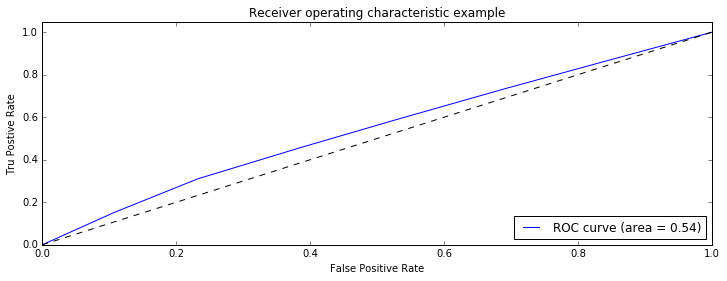

In [7]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Tru Postive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()

#### Building a Prediction Model  - Using Number of Vehiles to predict FATALITY - Logistic Regression with L1 Regularization 

Accident Severity: 1 = Fatal, 2	= Serious, 3 = Slight

In [8]:
RoadSafety2015 = pd.read_csv("UKAccident_2015.csv")
RoadSafety2015['Fatality'] = np.where(RoadSafety2015.Accident_Severity == 1, 1 , 0)
df = RoadSafety2015[['Number_of_Vehicles','Fatality']]
df = df.dropna(axis=0)

X1 = pd.DataFrame()
X1['Number_of_Vehicles'] = df['Number_of_Vehicles']
X = pd.get_dummies(X1.Number_of_Vehicles, drop_first=True)

y=df['Fatality']

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.5, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty ='l1', C=1)
model.fit(X_train, y_train)
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, penalty='l1', random_state=None, tol=0.0001)
print "Logistic Accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test))

Logistic Accuracy is 0.60


In [9]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
print "\n\n---Logistic Model---"
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test))



---Logistic Model---
Logistic AUC = 0.60
             precision    recall  f1-score   support

          0       0.59      0.67      0.63    112285
          1       0.61      0.53      0.57    110901

avg / total       0.60      0.60      0.60    223186



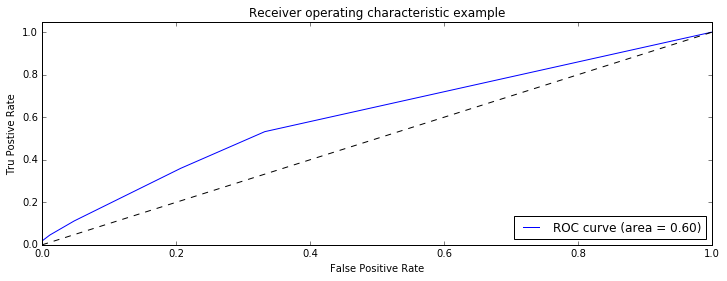

In [10]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Tru Postive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()

#### Building a Prediction Model  - Using ROAD_TYPE to predict FATALITY - Logistic Regression with L1 Regularization 

Road Type: 1 Roundabout, 2 One way street, 3 Dual carriageway, 6 Single carriageway, 7 Slip road
9 Unknown, 12 One way street/Slip road, -1 Data missing or out of range

Accident Severity: 1 = Fatal, 2	= Serious, 3 = Slight

In [11]:
RoadSafety2015 = pd.read_csv("UKAccident_2015.csv")
RoadSafety2015['Fatality'] = np.where(RoadSafety2015.Accident_Severity == 1, 1 , 0)
df = RoadSafety2015[['Road_Type','Fatality']]
df = df.dropna(axis=0)

X1 = pd.DataFrame()
X1['Road_Type'] = df['Road_Type']
X = pd.get_dummies(X1.Road_Type, drop_first=True)

y=df['Fatality']

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty ='l1', C=1)
model.fit(X_train, y_train)
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, penalty='l1', random_state=None, tol=0.0001)
print "Logistic Accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test))

Logistic Accuracy is 0.53


In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
print "\n\n---Logistic Model---"
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test))



---Logistic Model---
Logistic AUC = 0.54
             precision    recall  f1-score   support

          0       0.78      0.11      0.19     67366
          1       0.52      0.97      0.67     66546

avg / total       0.65      0.53      0.43    133912



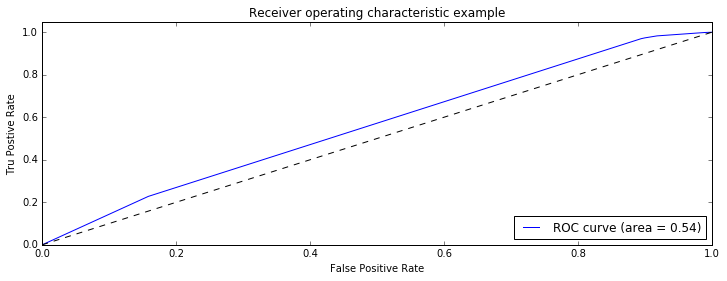

In [14]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Tru Postive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()

#### Building a Prediction Model  - Using LIGHT CONDITIONS to predict FATALITY - Logistic Regression with L1 Regularization 

Light Conditions: 1 Daylight, 4 Darkness - lights lit, 5 Darkness - lights unlit, 6 Darkness - no lighting
7 Darkness - lighting unknown, -1 Data missing or out of range

Accident Severity: 1 = Fatal, 2	= Serious, 3 = Slight

In [15]:
RoadSafety2015 = pd.read_csv("UKAccident_2015.csv")
RoadSafety2015['Fatality'] = np.where(RoadSafety2015.Accident_Severity == 1, 1 , 0)
df = RoadSafety2015[['Light_Conditions','Fatality']]
df = df.dropna(axis=0)

X1 = pd.DataFrame()
X1['Light_Conditions'] = df['Light_Conditions']
X = pd.get_dummies(X1.Light_Conditions, drop_first=True)

y=df['Fatality']

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.4, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty ='l1', C=1)
model.fit(X_train, y_train)
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, penalty='l1', random_state=None, tol=0.0001)
print "Logistic Accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test))

Logistic Accuracy is 0.57


In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
print "\n\n---Logistic Model---"
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test))



---Logistic Model---
Logistic AUC = 0.57
             precision    recall  f1-score   support

          0       0.54      0.94      0.69     89869
          1       0.77      0.20      0.32     88680

avg / total       0.66      0.57      0.50    178549



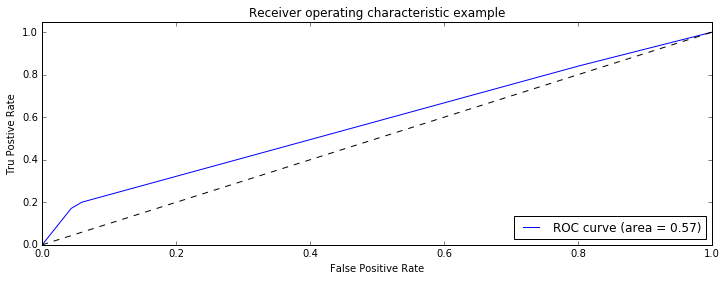

In [17]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Tru Postive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()

#### Building a Prediction Model  - Using WEATHER CONDITIONS to predict FATALITY - Logistic Regression with L1 Regularization 

Weather Conditions: 1 Fine no high winds, 2	Raining no high winds, 3 Snowing no high winds, 4,Fine + high winds
5 Raining + high winds, 6 Snowing + high winds, 7 Fog or mist, 8,Other, 9 Unknown
-1 Data missing or out of range


Accident Severity: 1 = Fatal, 2	= Serious, 3 = Slight

In [18]:
RoadSafety2015 = pd.read_csv("UKAccident_2015.csv")
RoadSafety2015['Fatality'] = np.where(RoadSafety2015.Accident_Severity == 1, 1 , 0)
df = RoadSafety2015[['Weather_Conditions','Fatality']]
df = df.dropna(axis=0)

X1 = pd.DataFrame()
X1['Weather_Conditions'] = df['Weather_Conditions']
X = pd.get_dummies(X1.Weather_Conditions, drop_first=True)

y=df['Fatality']

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.4, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty ='l1', C=1)
model.fit(X_train, y_train)
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, penalty='l1', random_state=None, tol=0.0001)
print "Logistic Accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test))

Logistic Accuracy is 0.52


In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
print "\n\n---Logistic Model---"
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test))



---Logistic Model---
Logistic AUC = 0.51
             precision    recall  f1-score   support

          0       0.51      0.96      0.67     89869
          1       0.63      0.06      0.12     88680

avg / total       0.57      0.52      0.39    178549



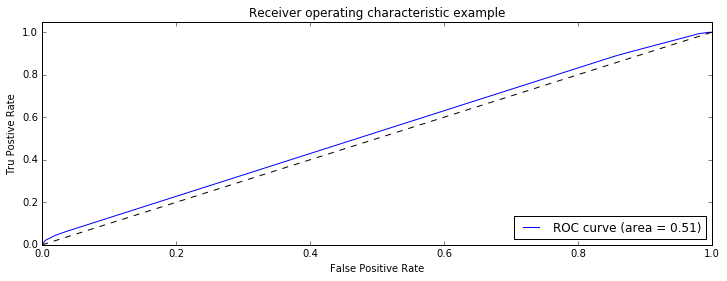

In [20]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Tru Postive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()

#### Building a Prediction Model  - Using VEHICLE TYPE to predict FATALITY - Logistic Regression with L1 Regularization 

 Vehicle Type:
1 Pedal cycle,2 Motorcycle 50cc and under,3 Motorcycle 125cc and under,4 Motorcycle over 125cc and up to 500cc,
5 Motorcycle over 500cc,8 Taxi/Private hire car,9 Car,10 Minibus (8 - 16 passenger seats),
11 Bus or coach (17 or more pass seats),16 Ridden horse,17 Agricultural vehicle,18 Tram,
19 Van / Goods 3.5 tonnes mgw or under,20 Goods over 3.5t. and under 7.5t
21 Goods 7.5 tonnes mgw and over,22 Mobility scooter,23 Electric motorcycle,90 Other vehicle
97 Motorcycle - unknown cc,98 Goods vehicle - unknown weight,-1 Data missing or out of range



Accident Severity: 1 = Fatal, 2	= Serious, 3 = Slight

In [21]:
RoadSafety2015 = pd.read_csv("UKAccident_2015.csv")
RoadSafety2015['Fatality'] = np.where(RoadSafety2015.Accident_Severity == 1, 1 , 0)
df = RoadSafety2015[['Vehicle_Type','Fatality']]
df = df.dropna(axis=0)

X1 = pd.DataFrame()
X1['Vehicle_Type'] = df['Vehicle_Type']
X = pd.get_dummies(X1.Vehicle_Type, drop_first=True)

y=df['Fatality']

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.4, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty ='l1', C=1)
model.fit(X_train, y_train)
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, penalty='l1', random_state=None, tol=0.0001)
print "Logistic Accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test))

Logistic Accuracy is 0.59


In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
print "\n\n---Logistic Model---"
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test))



---Logistic Model---
Logistic AUC = 0.59
             precision    recall  f1-score   support

          0       0.56      0.85      0.68     89869
          1       0.69      0.32      0.44     88680

avg / total       0.62      0.59      0.56    178549



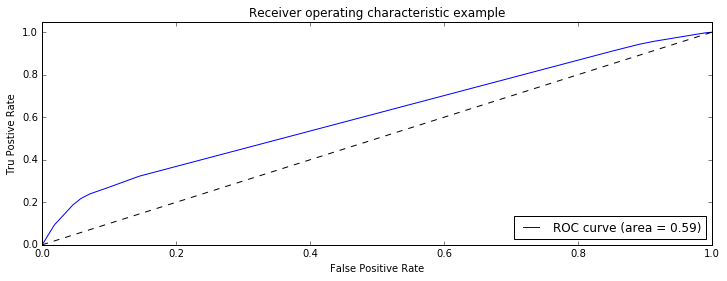

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Tru Postive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()

#### Building a Prediction Model  - Using AGE OF VEHICLE to predict FATALITY - Logistic Regression with L1 Regularization 

 Accident Severity: 1 = Fatal, 2	= Serious, 3 = Slight

In [24]:
RoadSafety2015 = pd.read_csv("UKAccident_2015.csv")
RoadSafety2015['Fatality'] = np.where(RoadSafety2015.Accident_Severity == 1, 1 , 0)
df = RoadSafety2015[['Age_of_Vehicle','Fatality']]
df = df.dropna(axis=0)

X1 = pd.DataFrame()
X1['Age_of_Vehicle'] = df['Age_of_Vehicle']
X = pd.get_dummies(X1.Age_of_Vehicle, drop_first=True)

y=df['Fatality']

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.4, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty ='l1', C=1)
model.fit(X_train, y_train)
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, penalty='l1', random_state=None, tol=0.0001)
print "Logistic Accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test))

Logistic Accuracy is 0.53


In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
print "\n\n---Logistic Model---"
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test))



---Logistic Model---
Logistic AUC = 0.53
             precision    recall  f1-score   support

          0       0.53      0.57      0.55     89869
          1       0.53      0.50      0.52     88680

avg / total       0.53      0.53      0.53    178549



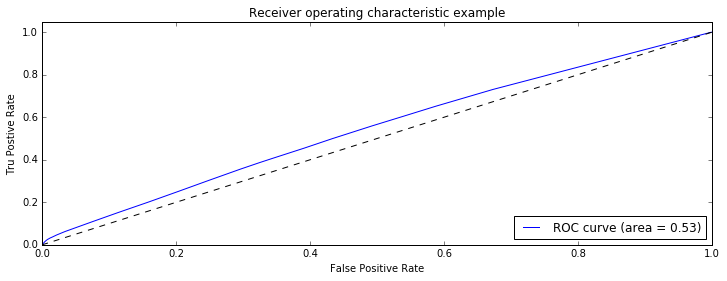

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Tru Postive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()

#### Building a Prediction Model  Using below variables to predict FATALITY - Logistic Regression with L1 Regularization 

Sex_of_Driver, Day_of_Week, Number_of_Vehicles, Road_Type, Light_Conditions, Weather_Conditions, Vehicle_Type, Age_of_Vehicle

 Accident Severity: 1 = Fatal, 2	= Serious, 3 = Slight

In [27]:
RoadSafety2015 = pd.read_csv("UKAccident_2015.csv")
RoadSafety2015['Fatality'] = np.where(RoadSafety2015.Accident_Severity == 1, 1 , 0)
df = RoadSafety2015[['Sex_of_Driver', 'Day_of_Week', 'Number_of_Vehicles', 'Road_Type', 'Light_Conditions', 
                     'Weather_Conditions', 'Vehicle_Type', 'Age_of_Vehicle','Fatality']]
df = df.dropna(axis=0)

X = df[['Sex_of_Driver', 'Day_of_Week', 'Number_of_Vehicles', 'Road_Type', 'Light_Conditions', 
                     'Weather_Conditions', 'Vehicle_Type', 'Age_of_Vehicle']]

y=df['Fatality']

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.4, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty ='l1', C=1)
model.fit(X_train, y_train)
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, penalty='l1', random_state=None, tol=0.0001)
print "Logistic Accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test))

Logistic Accuracy is 0.61


In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
print "\n\n---Logistic Model---"
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test))



---Logistic Model---
Logistic AUC = 0.61
             precision    recall  f1-score   support

          0       0.60      0.63      0.62     89869
          1       0.61      0.58      0.59     88680

avg / total       0.61      0.61      0.61    178549



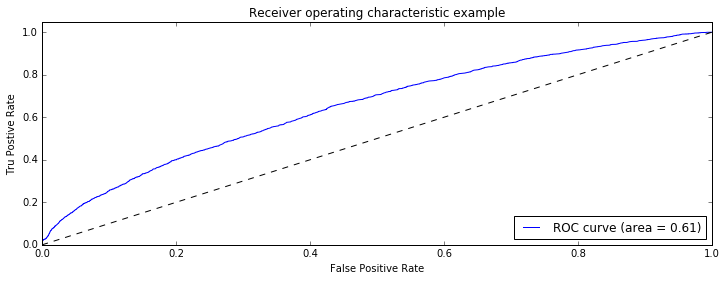

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Tru Postive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()